In [12]:
# !pip freeze > requirements.txt
# !pip install -r requirements.txt

In [13]:
import os
import pandas as pd
from src.data_processor import DataProcessor
from src.risk_factor_analyzer import RiskFactorAnalyzer

In [14]:
files = os.listdir('data')
files = [file for file in files if file.split('.')[-1] == 'csv']
file_names = [file.split('.')[0] for file in files]
file_paths = {file_name: file for file_name, file in zip(file_names, list(map(lambda x: 'data/' + x, files)))}
file_paths, len(file_paths)

({'moex_ind': 'data/moex_ind.csv',
  'CHMF': 'data/CHMF.csv',
  'gazp': 'data/gazp.csv',
  'ROSN': 'data/ROSN.csv',
  'SU46023RMFS6': 'data/SU46023RMFS6.csv',
  'SNGSP': 'data/SNGSP.csv',
  'sber': 'data/sber.csv',
  'STSB': 'data/STSB.csv',
  'MGNT': 'data/MGNT.csv',
  'brent_prices': 'data/brent_prices.csv',
  'SU26212RMFS9': 'data/SU26212RMFS9.csv',
  'GMKN': 'data/GMKN.csv',
  'eur_rate': 'data/eur_rate.csv',
  'int_rate': 'data/int_rate.csv',
  'LPSB': 'data/LPSB.csv',
  'rts_ind': 'data/rts_ind.csv',
  'SU29020RMFS3': 'data/SU29020RMFS3.csv',
  'usd_rate': 'data/usd_rate.csv',
  'LKOH': 'data/LKOH.csv',
  'SU29015RMFS3': 'data/SU29015RMFS3.csv',
  'SU29009RMFS6': 'data/SU29009RMFS6.csv'},
 21)

In [15]:
# Пример создания списка торговых дней
start_date = '2020-01-01'
end_date = '2024-01-01'
trading_days = pd.DataFrame({'date': pd.date_range(start=start_date, end=end_date, freq='B')})

In [16]:
# Инициализируем процессор данных
data_processor = DataProcessor(trading_days)

In [17]:
# Загружаем и объединяем данные
data_frames = data_processor.load_data(file_paths)
renamed_data_frames = data_processor.rename_columns(data_frames)
all_data = data_processor.merge_data(renamed_data_frames)
cleaned_data = data_processor.clean_data(all_data)
filled_data = data_processor.fill_missing_data(cleaned_data, method='ffill')
full_data = filled_data.dropna()

In [18]:
full_data

date  moex_ind_CLOSE  moex_ind_OPEN  moex_ind_HIGH  moex_ind_LOW  \
225  2020-11-11         3015.03        3004.63        3031.69       3004.20   
226  2020-11-12         3025.83        2997.79        3028.52       2988.03   
227  2020-11-13         3025.22        3007.16        3027.45       2995.17   
228  2020-11-16         3079.74        3054.35        3081.28       3046.77   
229  2020-11-17         3052.22        3081.05        3087.19       3027.76   
...         ...             ...            ...            ...           ...   
1039 2023-12-26         3094.72        3090.39        3098.69       3080.92   
1040 2023-12-27         3097.49        3100.99        3112.19       3097.31   
1041 2023-12-28         3101.99        3099.56        3101.99       3081.98   
1042 2023-12-29         3099.11        3092.66        3102.08       3086.26   
1043 2024-01-01         3099.11        3092.66        3102.08       3086.26   

      CHMF_<OPEN>  CHMF_<HIGH>  CHMF_<LOW>  CHMF_<CLOSE>  CHMF_<VOL>  ...  \
225        1093.0       1102.6      1087.6        1096.4   1032650.0  ...   
226        1095.4       1104.8      1082.6        1091.4   1209917.0  ...   
227        1092.8       1110.0      1085.0        1109.0    971925.0  ...   
228        1114.6       1134.8      1111.4        1132.0   1312000.0  ...   
229        1132.6       1134.0      1106.0        1116.2   1217496.0  ...   
...           ...          ...         ...           ...         ...  ...   
1039       1343.6       1377.2      1338.0        1375.2    767559.0  ...   
1040       1376.0       1389.4      1375.0        1382.0    646107.0  ...   
1041       1382.6       1414.0      1375.2        1408.0    891068.0  ...   
1042       1408.4       1409.8      1392.0        1407.0    558087.0  ...   
1043       1408.4       1409.8      1392.0        1407.0    558087.0  ...   

      SU29015RMFS3_Номинал  SU29015RMFS3_Ставка купона,  % годовых  \
225                    0.0                                     0.0   
226                    0.0                                     0.0   
227                    0.0                                     0.0   
228                    0.0                                     0.0   
229                    0.0                                     0.0   
...                    ...                                     ...   
1039                   0.0                                     0.0   
1040                   0.0                                     0.0   
1041                   0.0                                     0.0   
1042                   0.0                                     0.0   
1043                   0.0                                     0.0   

      SU29015RMFS3_Размер выплаты  SU29009RMFS6_<OPEN>  SU29009RMFS6_<HIGH>  \
225                           0.0              109.030              109.041   
226                           0.0              108.635              109.040   
227                           0.0              108.499              108.499   
228                           0.0              108.488              108.488   
229                           0.0              107.999              108.153   
...                           ...                  ...                  ...   
1039                          0.0              102.977              103.113   
1040                          0.0              102.840              103.140   
1041                          0.0              103.235              103.253   
1042                          0.0              103.327              103.479   
1043                          0.0              103.327              103.479   

      SU29009RMFS6_<LOW>  SU29009RMFS6_<CLOSE>  SU29009RMFS6_Номинал  \
225              108.820               109.000                   0.0   
226              106.800               108.198                   0.0   
227              107.802               108.168                   0.0   
228              107.900               108.250             

In [23]:
# #на случай если мы захотим удалить ненужные столбцы с ценами всего что не закрытие
prefixes_to_drop = ['OPEN', "HIGH", "LOW"]
for prefix in prefixes_to_drop:
    full_data = full_data.loc[:, ~full_data.columns.str.contains(prefix)]
full_data

date  moex_ind_CLOSE  CHMF_<CLOSE>  CHMF_<VOL>  gazp_<CLOSE>  \
225  2020-11-11         3015.03        1096.4   1032650.0        170.53   
226  2020-11-12         3025.83        1091.4   1209917.0        172.91   
227  2020-11-13         3025.22        1109.0    971925.0        180.30   
228  2020-11-16         3079.74        1132.0   1312000.0        185.32   
229  2020-11-17         3052.22        1116.2   1217496.0        182.90   
...         ...             ...           ...         ...           ...   
1039 2023-12-26         3094.72        1375.2    767559.0        161.00   
1040 2023-12-27         3097.49        1382.0    646107.0        159.86   
1041 2023-12-28         3101.99        1408.0    891068.0        159.14   
1042 2023-12-29         3099.11        1407.0    558087.0        159.52   
1043 2024-01-01         3099.11        1407.0    558087.0        159.52   

       gazp_<VOL>  ROSN_<CLOSE>  ROSN_<VOL>  SU46023RMFS6_<CLOSE>  \
225    72020230.0        419.35  16134680.0               110.799   
226    71917150.0        412.30   7707490.0               110.799   
227   104602920.0        419.35   6385910.0               109.000   
228    89217810.0        430.95  12954860.0               110.992   
229    99307240.0        438.85  15121160.0               110.999   
...           ...           ...         ...                   ...   
1039   18570500.0        589.30   2228358.0                96.518   
1040   23711980.0        594.55   2901799.0                96.400   
1041   24851430.0        591.90   1817659.0                96.326   
1042   19239480.0        593.20   1874246.0                96.655   
1043   19239480.0        593.20   1874246.0                96.655   

      SU46023RMFS6_Номинал  ...  LKOH_<CLOSE>  LKOH_<VOL>  \
225                    0.0  ...        4945.0   2663948.0   
226                    0.0  ...        4853.0   1861773.0   
227                    0.0  ...        4879.0    948327.0   
228                    0.0  ...        4932.5   1400619.0   
229                    0.0  ...        4864.0   1512090.0   
...                    ...  ...           ...         ...   
1039                   0.0  ...        6771.0    430163.0   
1040                   0.0  ...        6768.0    496504.0   
1041                   0.0  ...        6767.0    440041.0   
1042                   0.0  ...        6739.0    279198.0   
1043                   0.0  ...        6739.0    279198.0   

      SU29015RMFS3_<CLOSE>  SU29015RMFS3_Номинал  \
225                 96.899                   0.0   
226                 96.929                   0.0   
227                 96.929                   0.0   
228                 96.810                   0.0   
229                 96.810                   0.0   
...                    ...                   ...   
1039                99.641                   0.0   
1040               100.000                   0.0   
1041               100.002                   0.0   
1042                99.664                   0.0   
1043                99.664                   0.0   

      SU29015RMFS3_Ставка купона,  % годовых  SU29015RMFS3_Размер выплаты  \
225                                      0.0                          0.0   
226                                      0.0                          0.0   
227                                      0.0                          0.0   
228                                      0.0                          0.0   
229                                      0.0                          0.0   
...                                      ...                          ...   
1039                                     0.0                          0.0   
1040                                     0.0                          0.0   
1041                                     0.0                          0.0   
1042                                     0.0                          0.0   
1043                                     0.0                          0.0   

In [19]:
# Инициализация и использование класса
analyzer = RiskFactorAnalyzer(full_data)
analyzer.handle_missing_data()
analyzer.fill_missing_data()

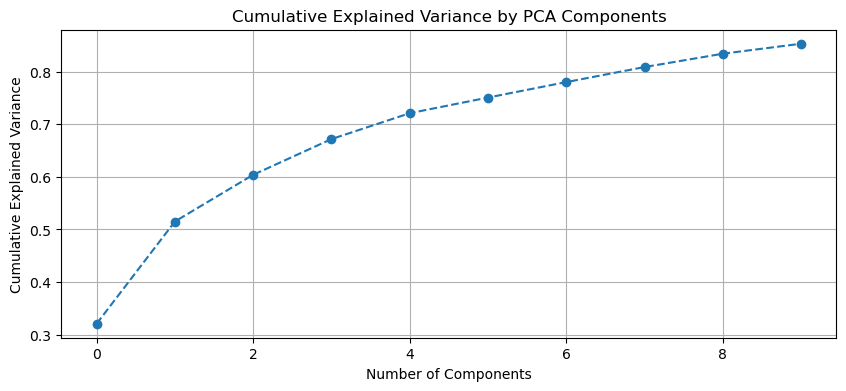

In [20]:
# Выполнение PCA
analyzer.perform_pca(n_components=10)
analyzer.plot_pca_variance()

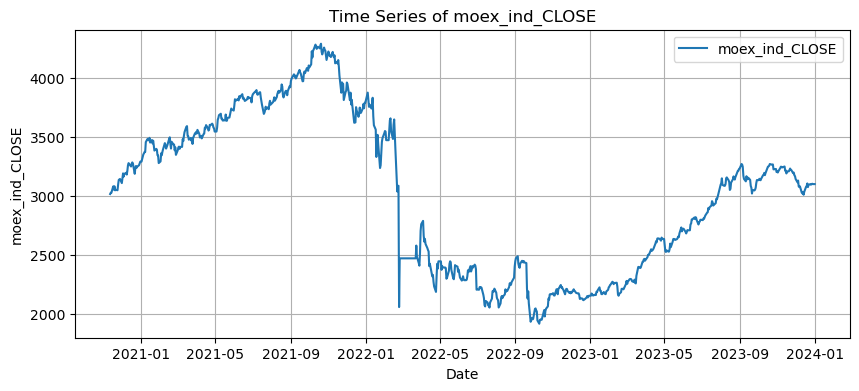

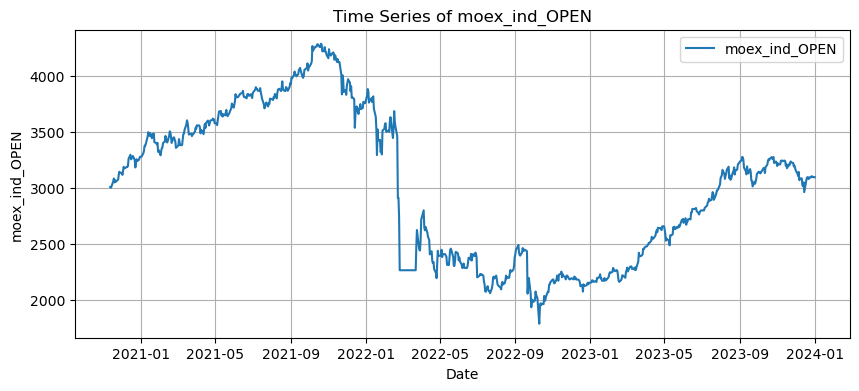

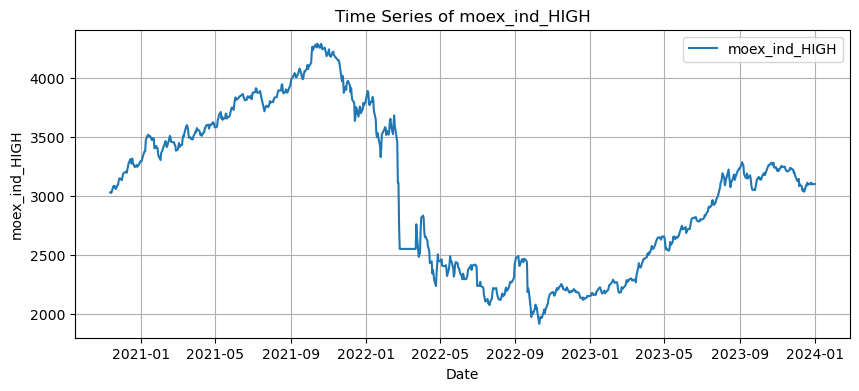

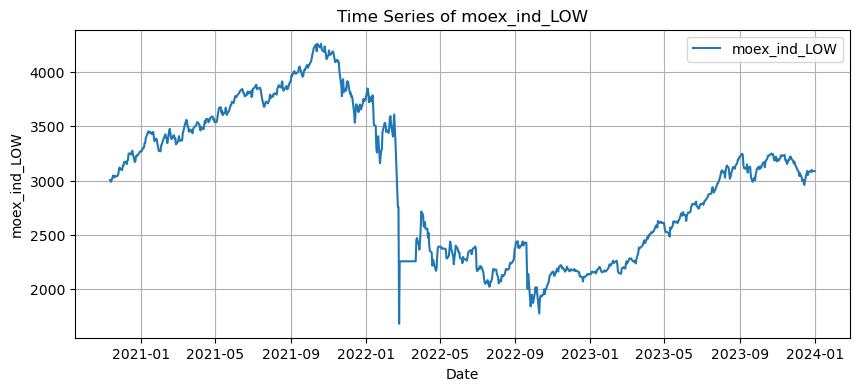

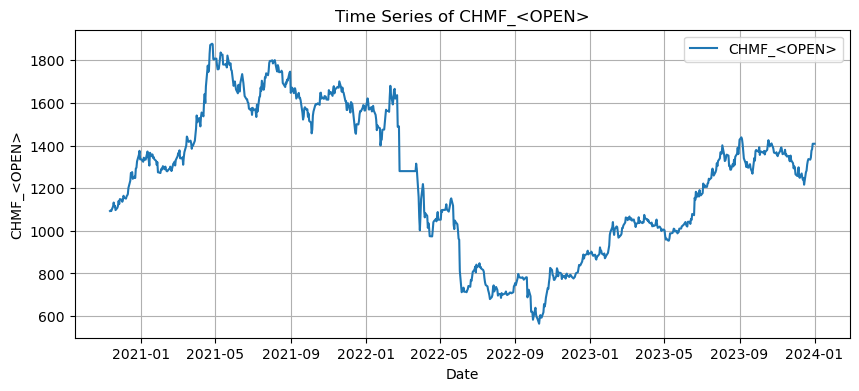

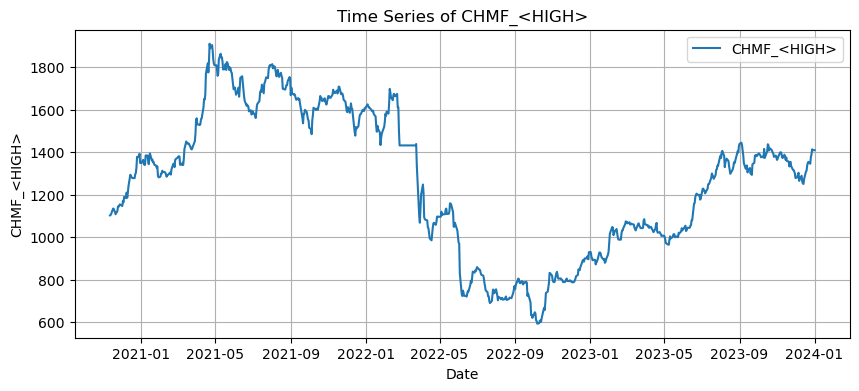

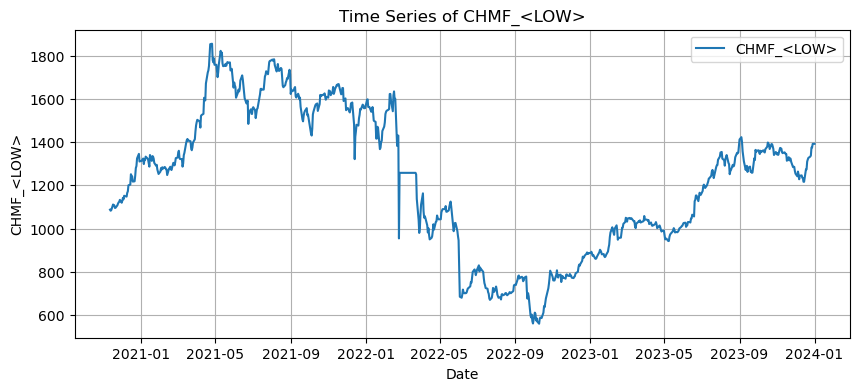

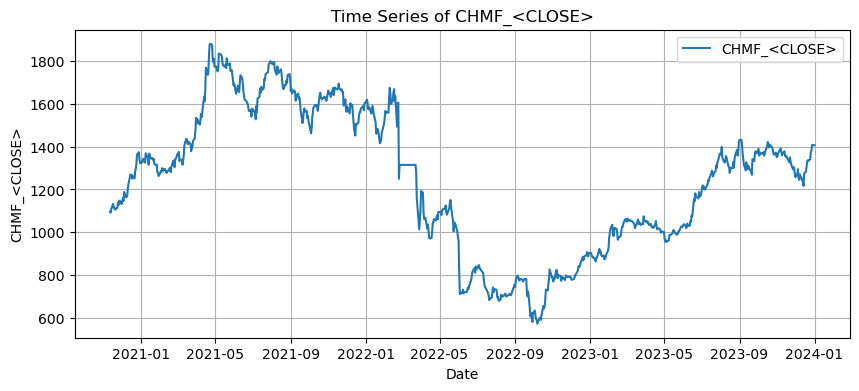

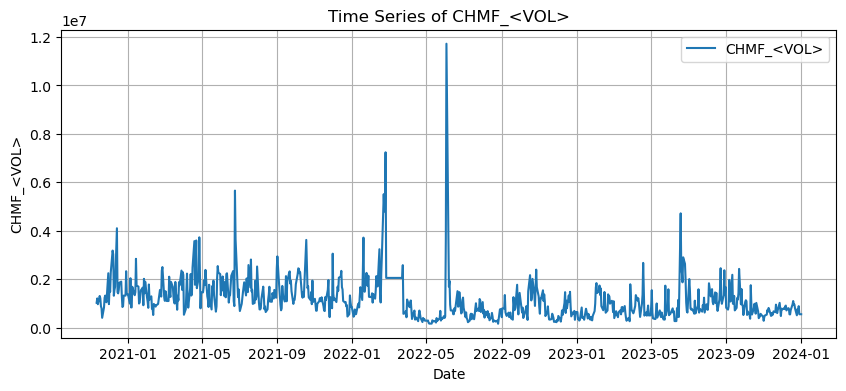

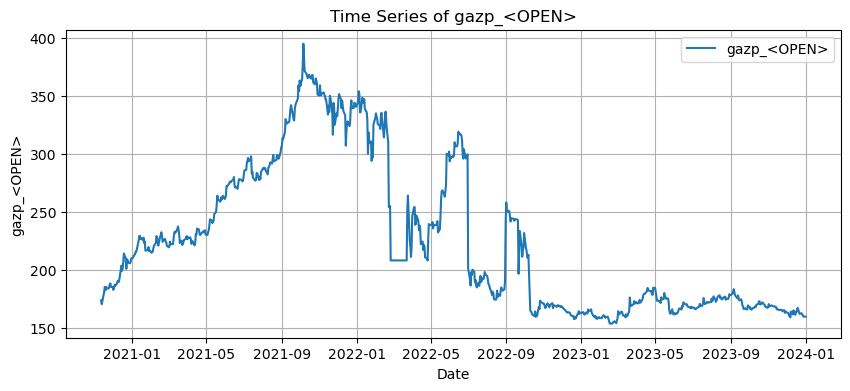

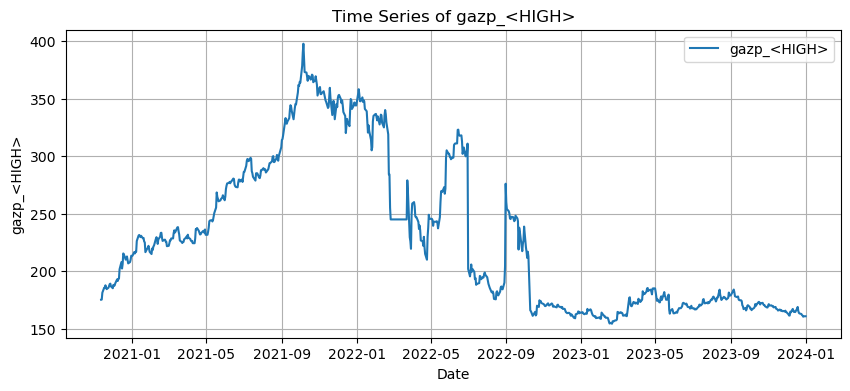

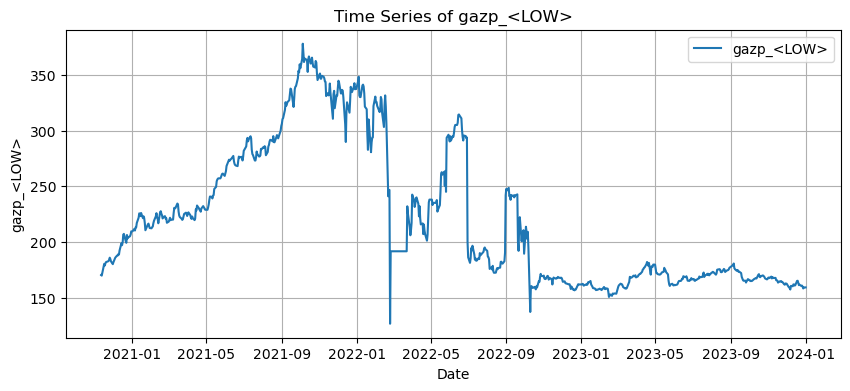

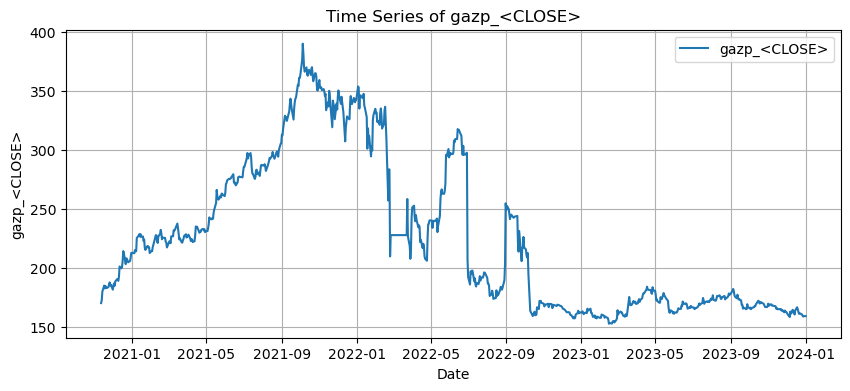

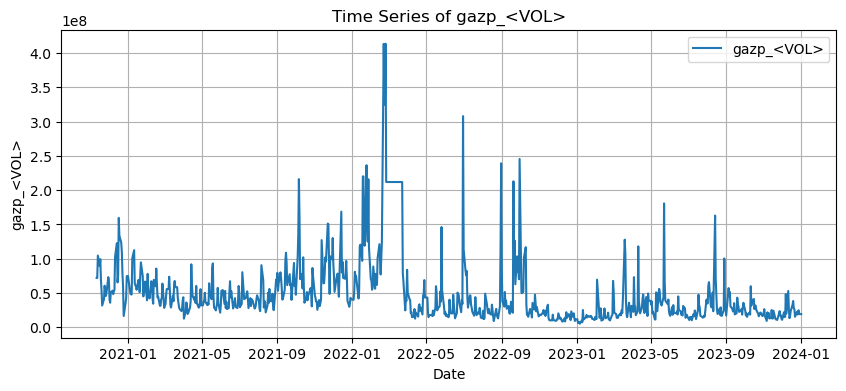

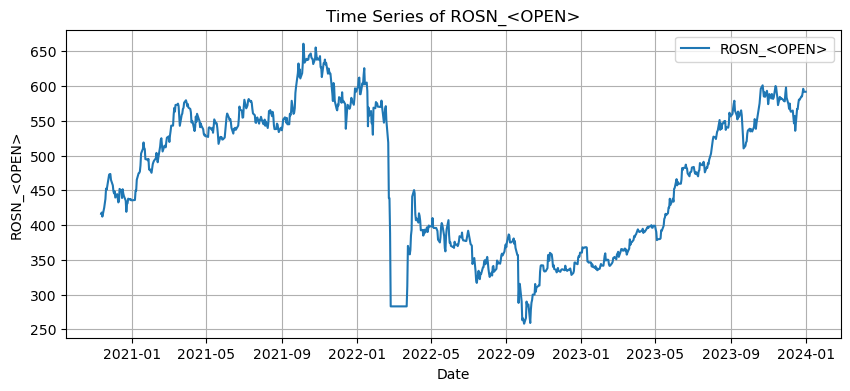

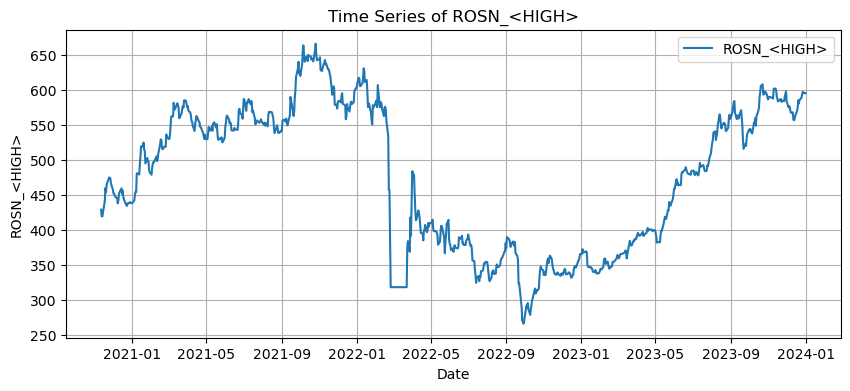

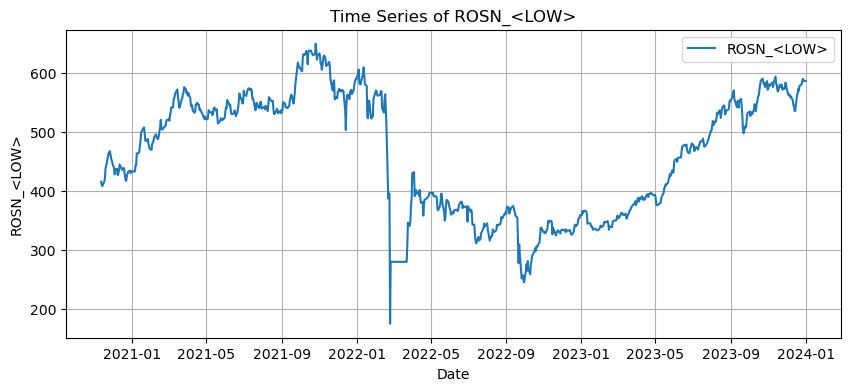

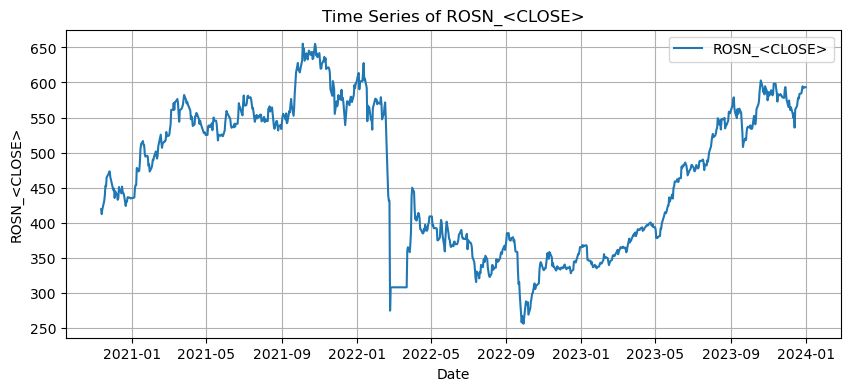

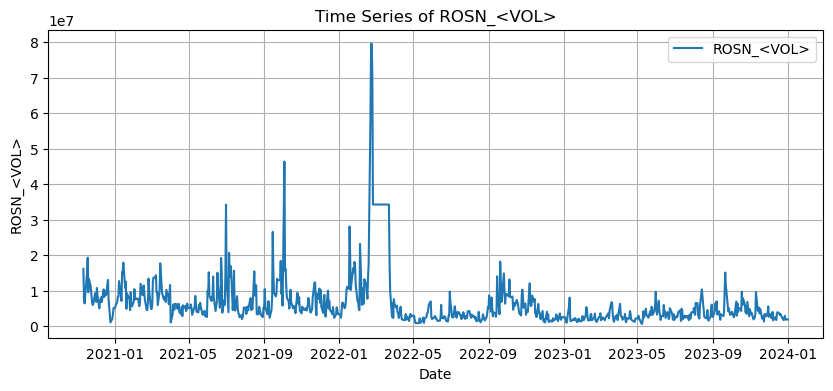

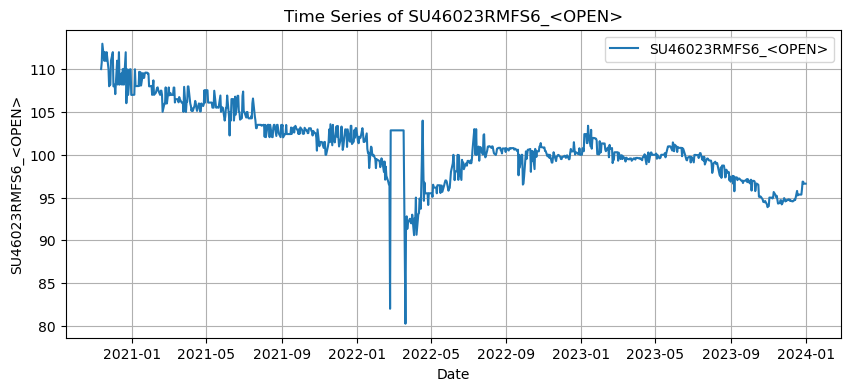

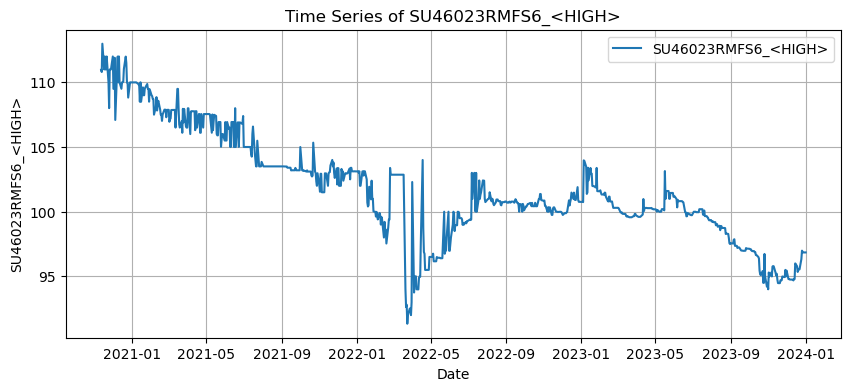

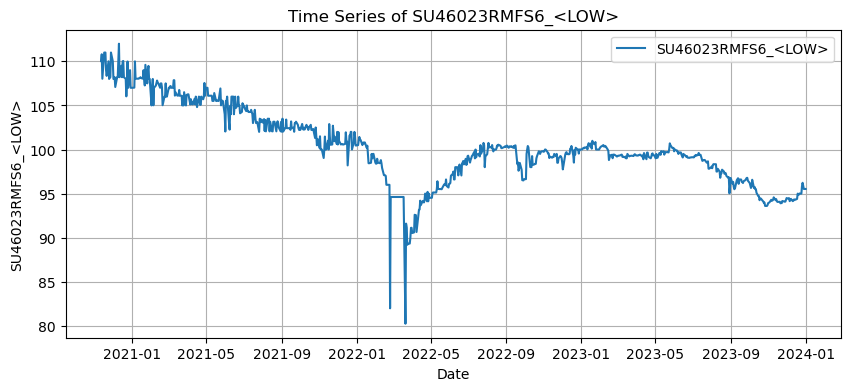

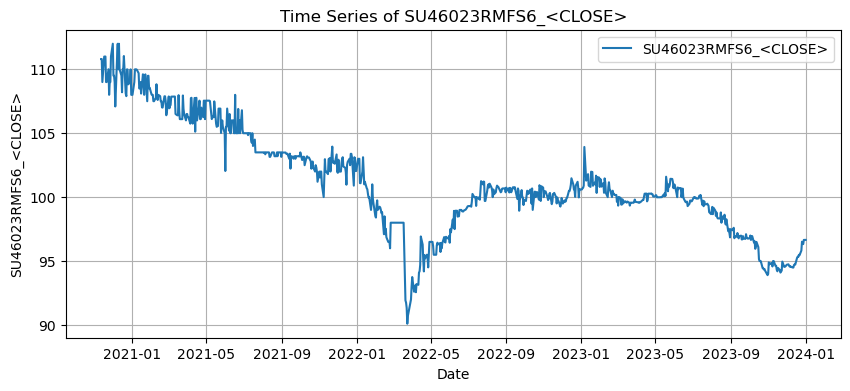

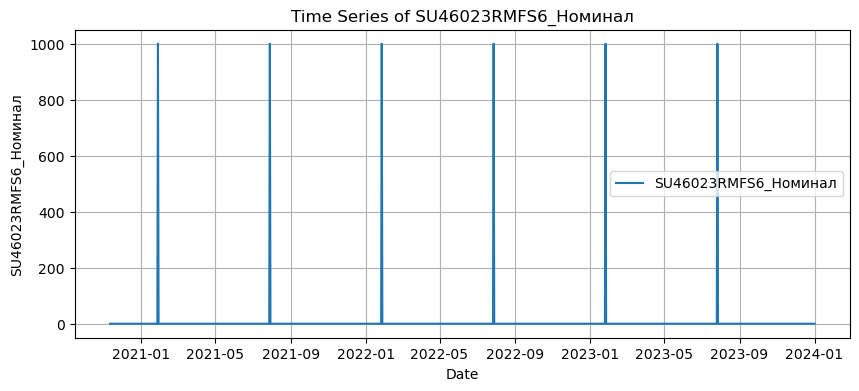

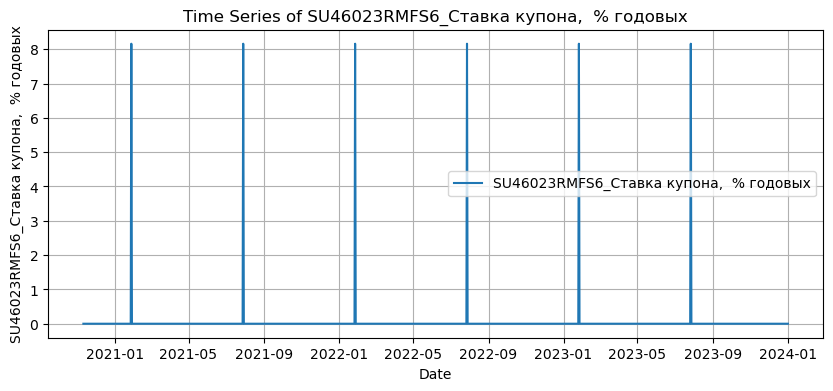

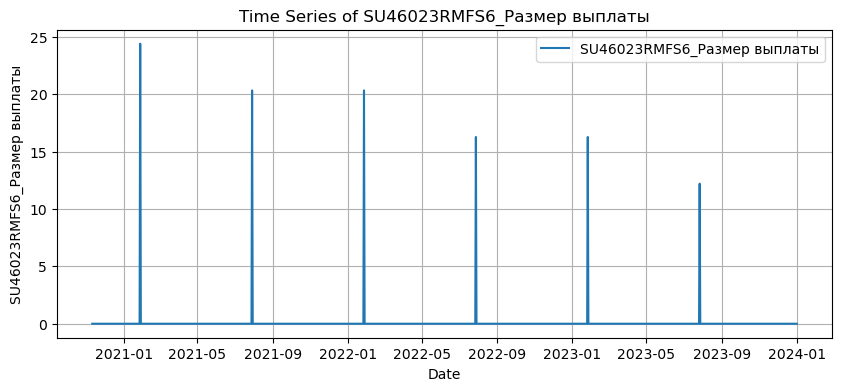

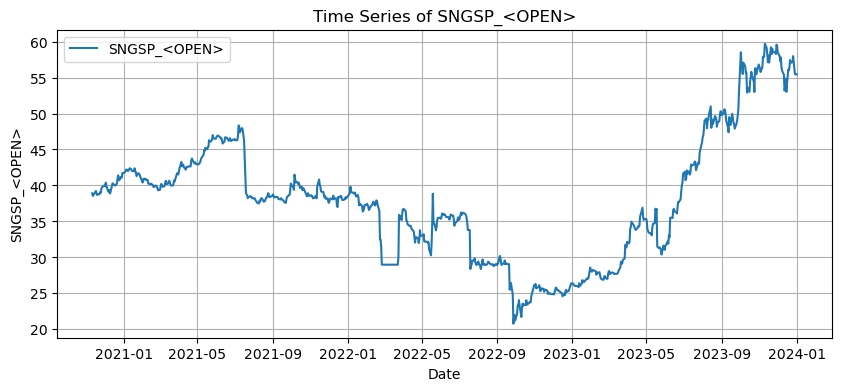

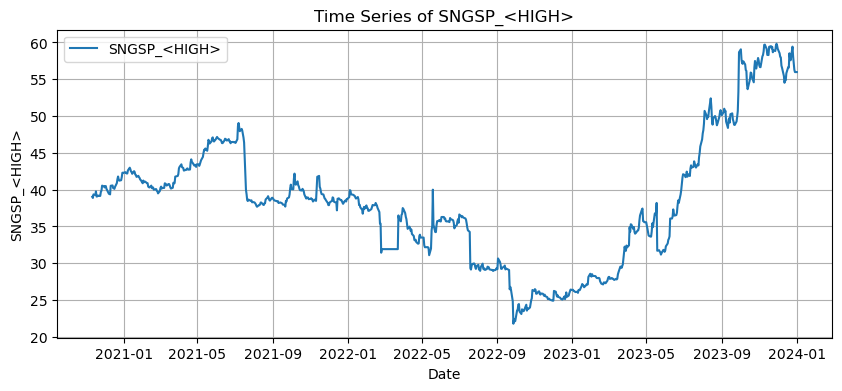

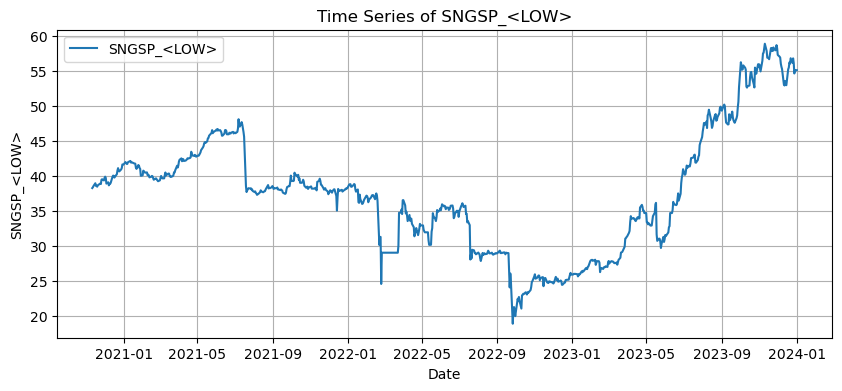

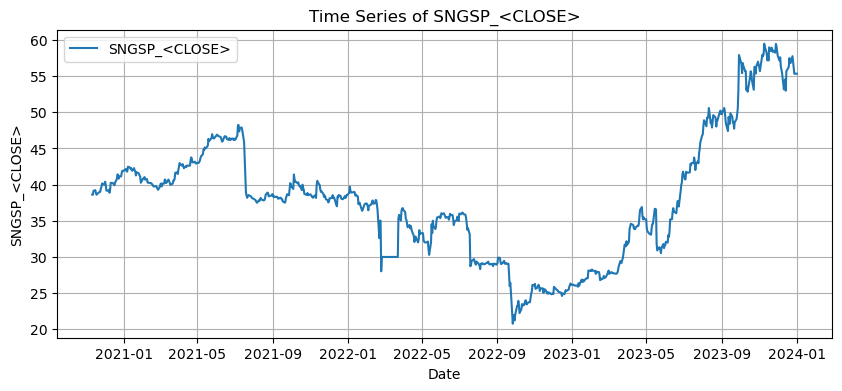

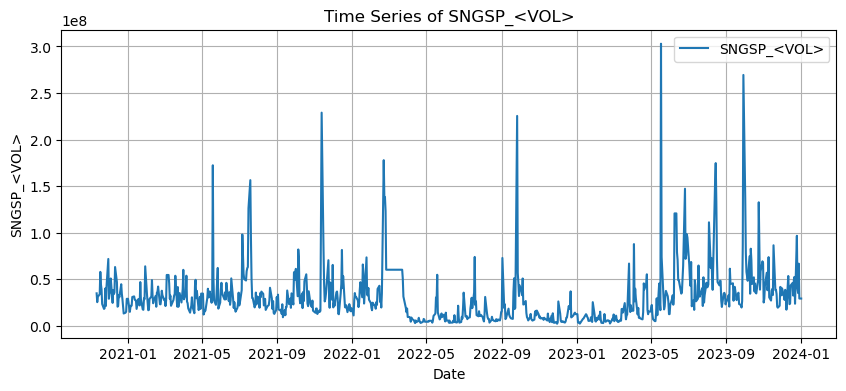

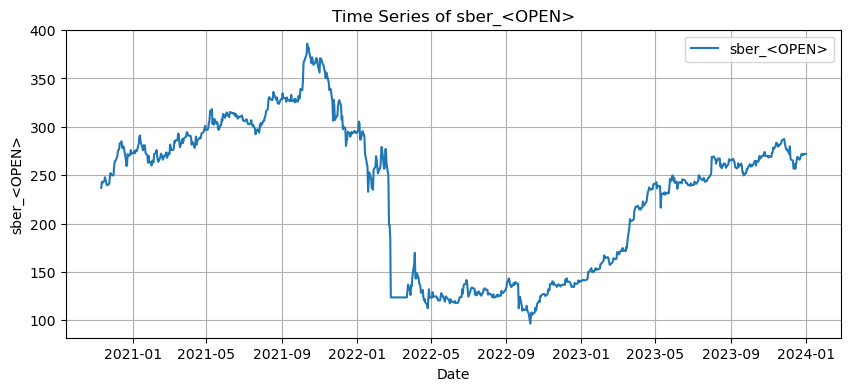

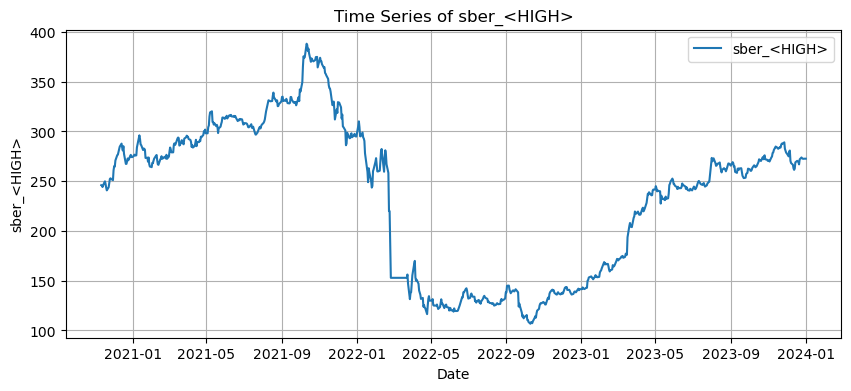

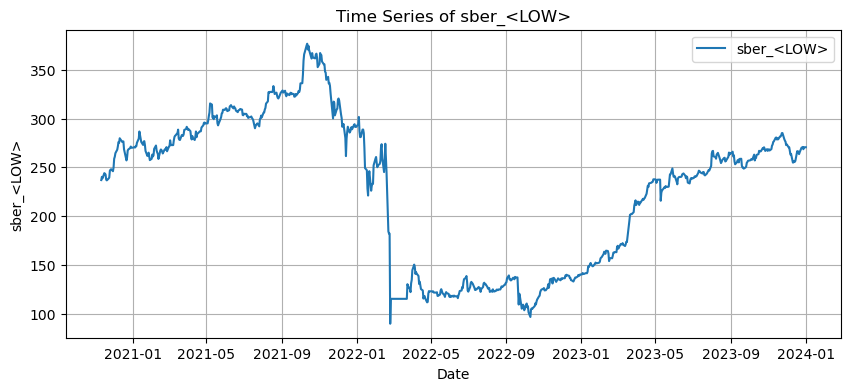

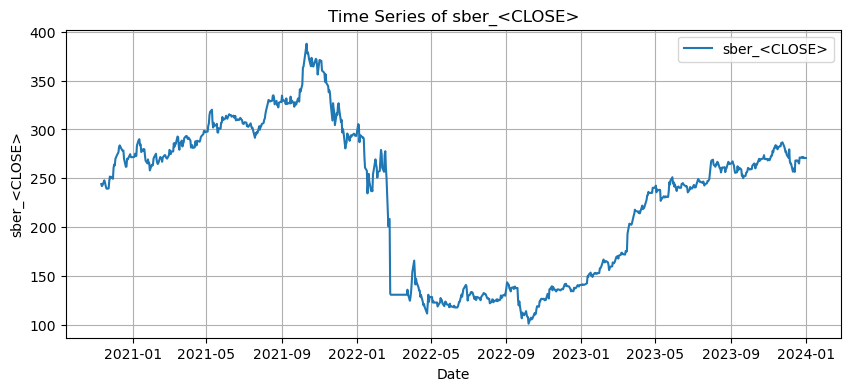

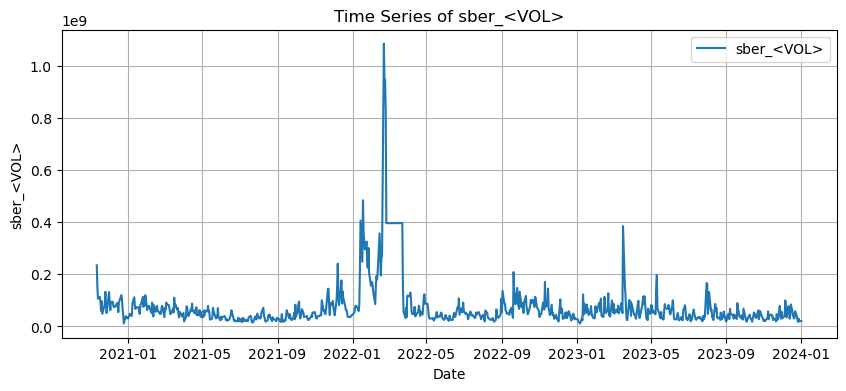

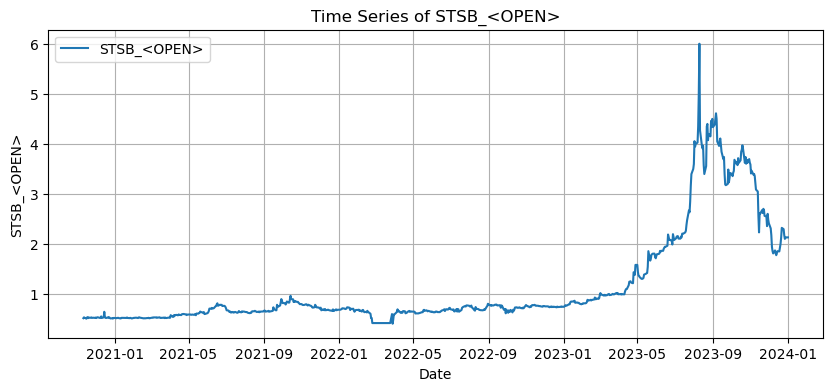

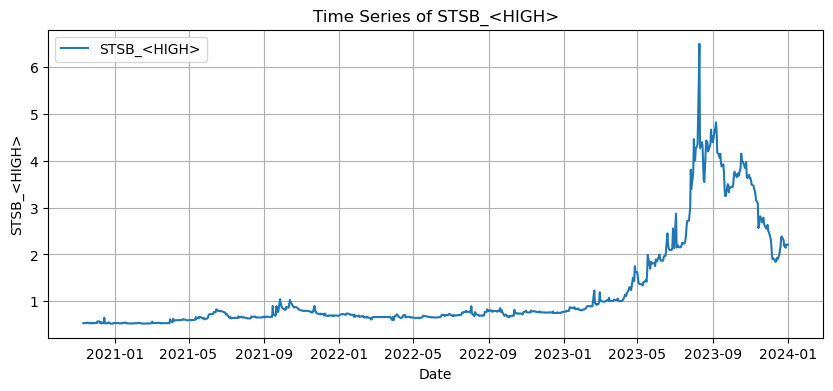

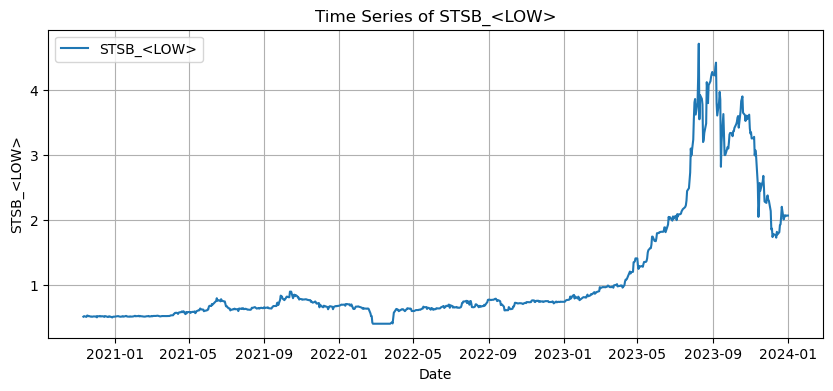

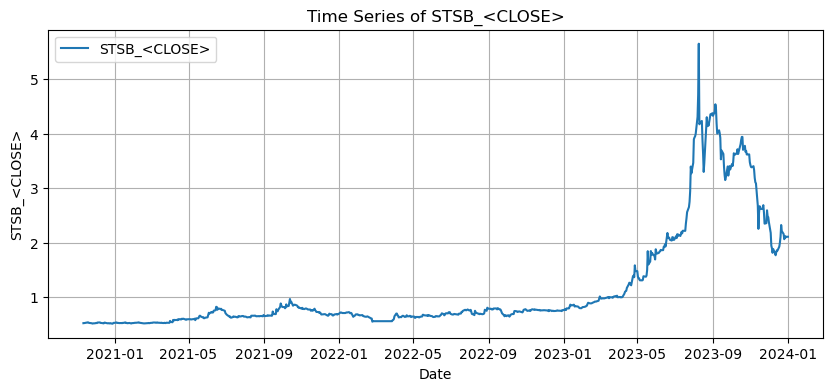

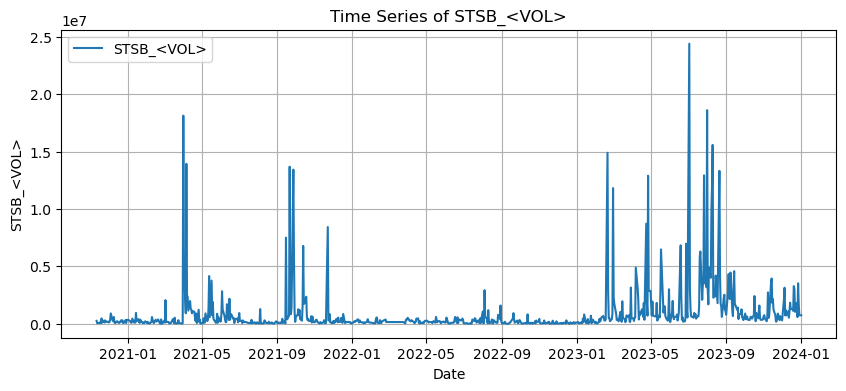

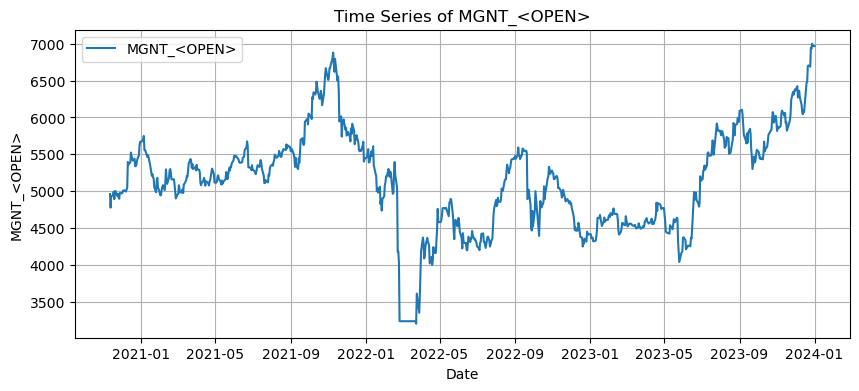

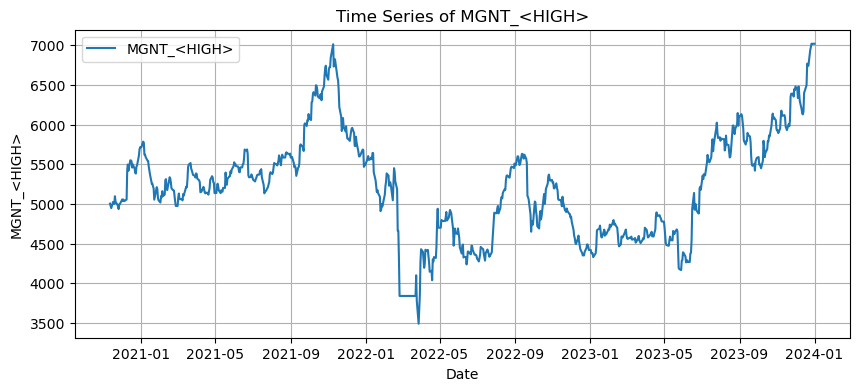

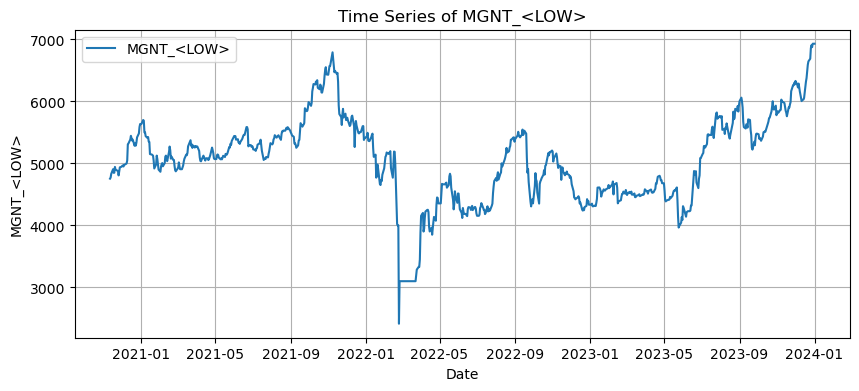

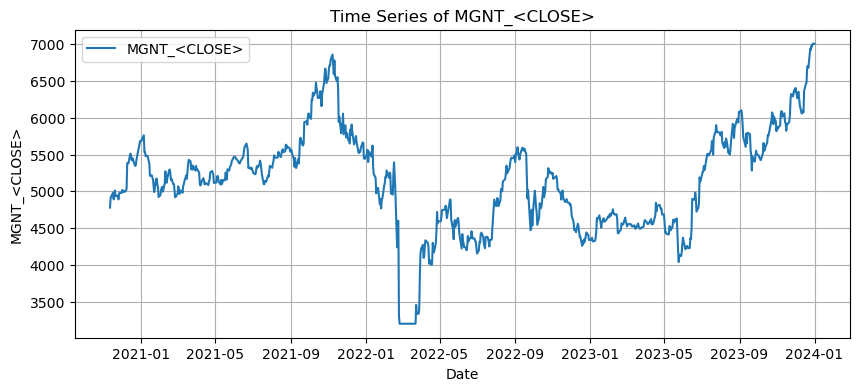

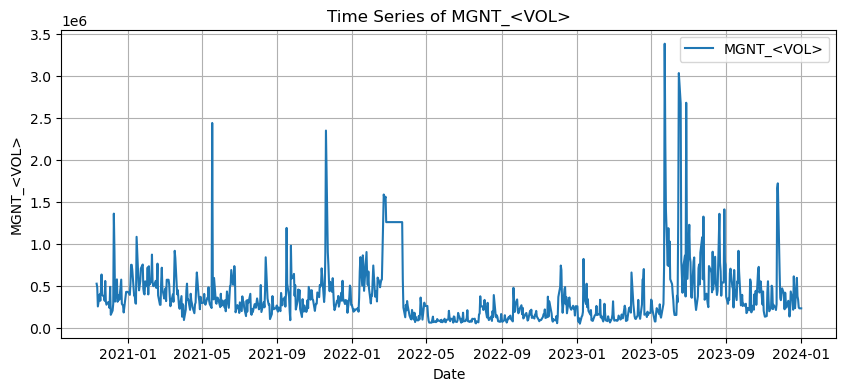

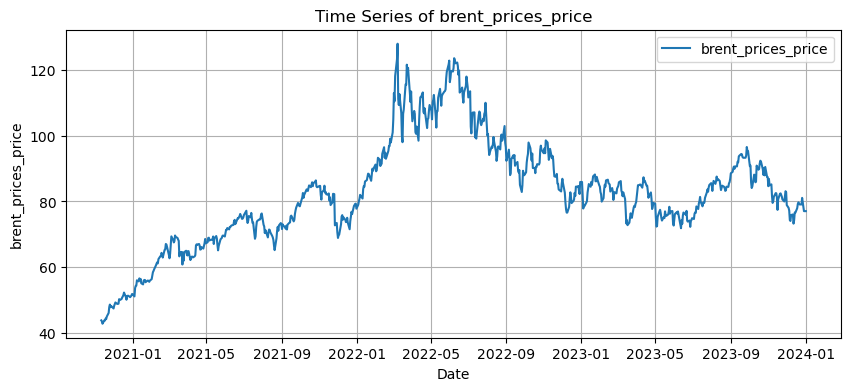

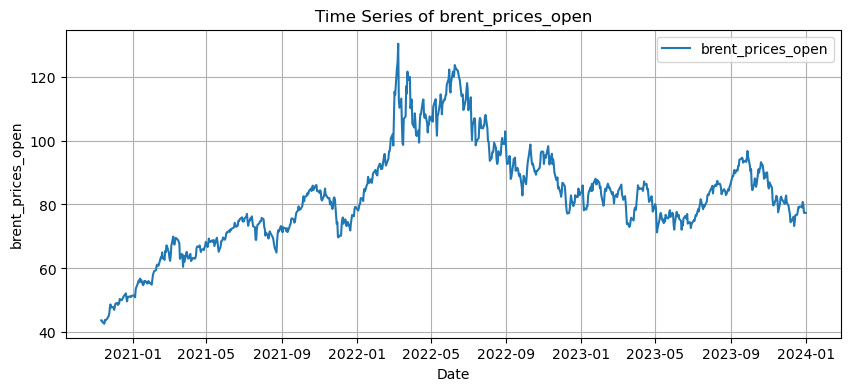

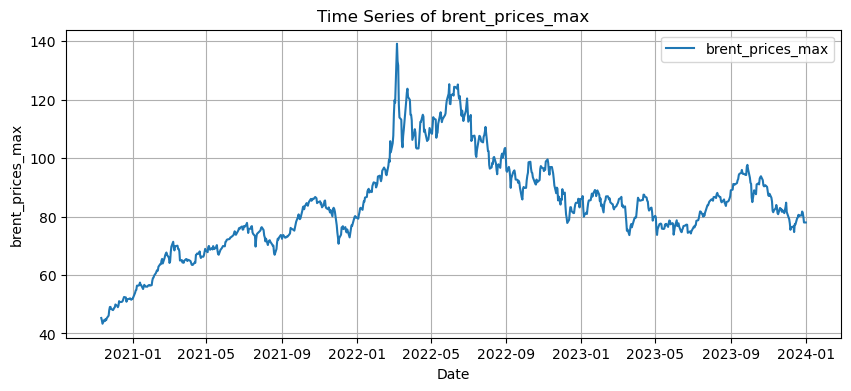

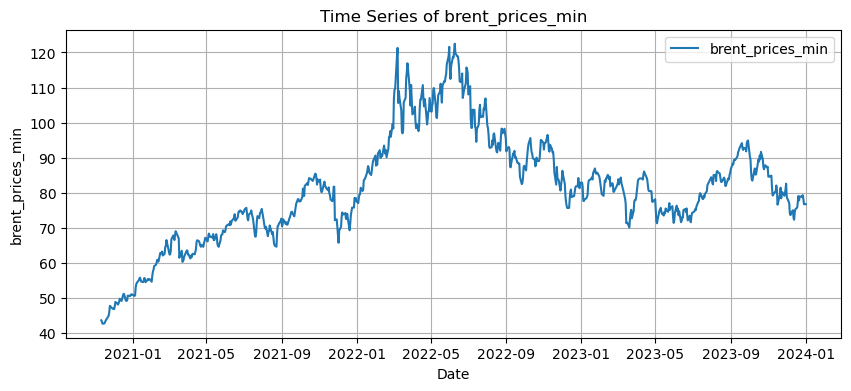

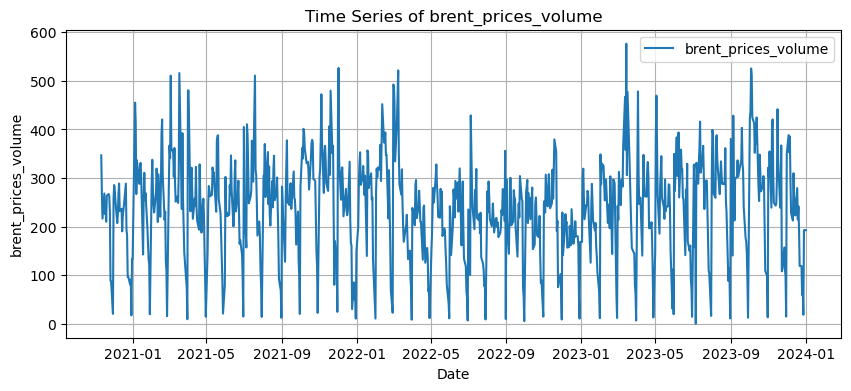

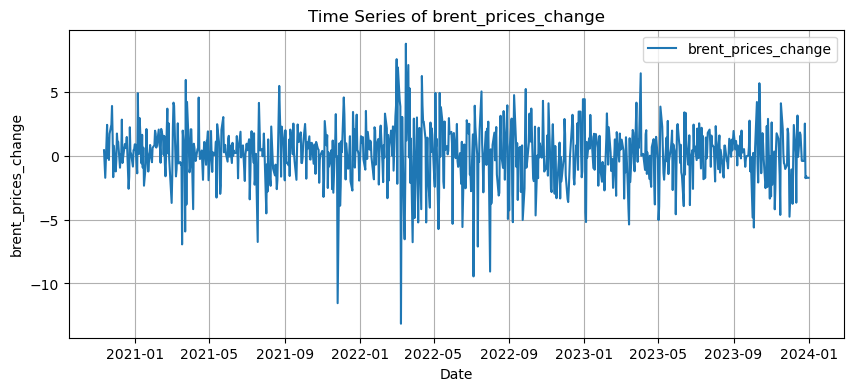

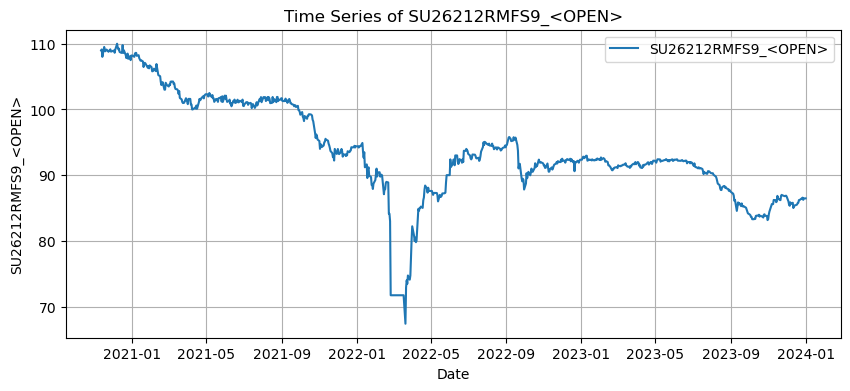

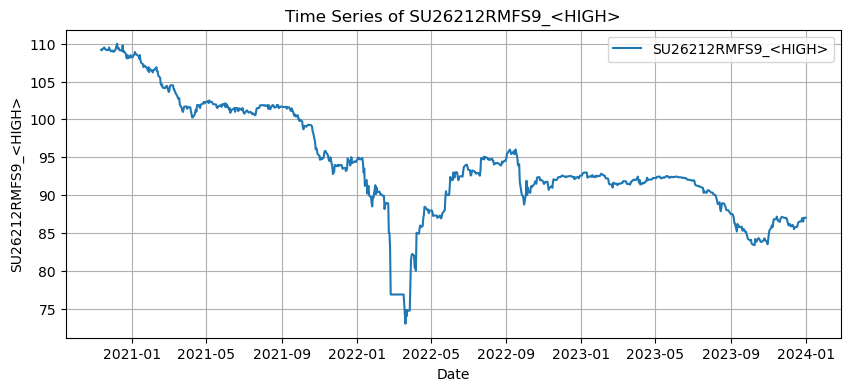

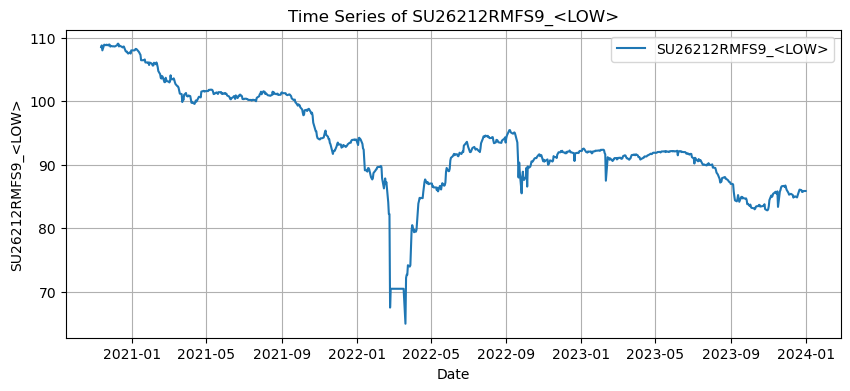

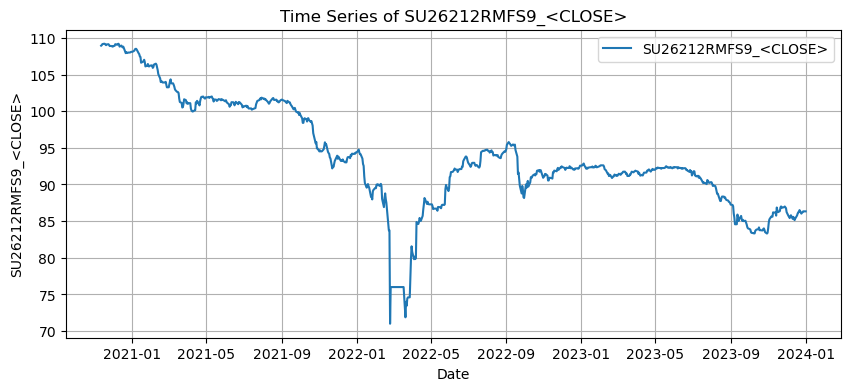

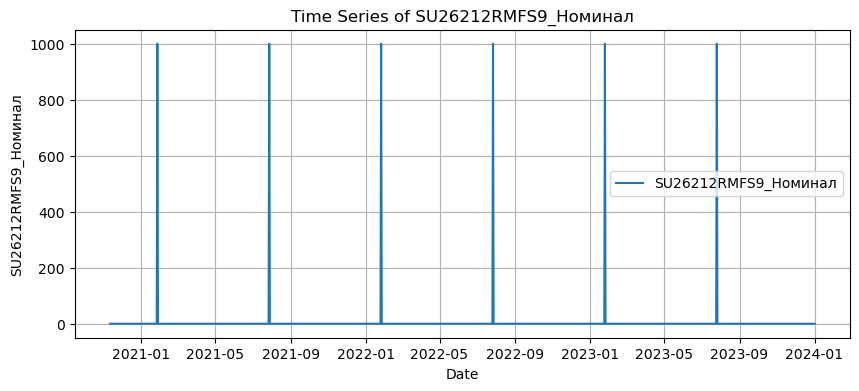

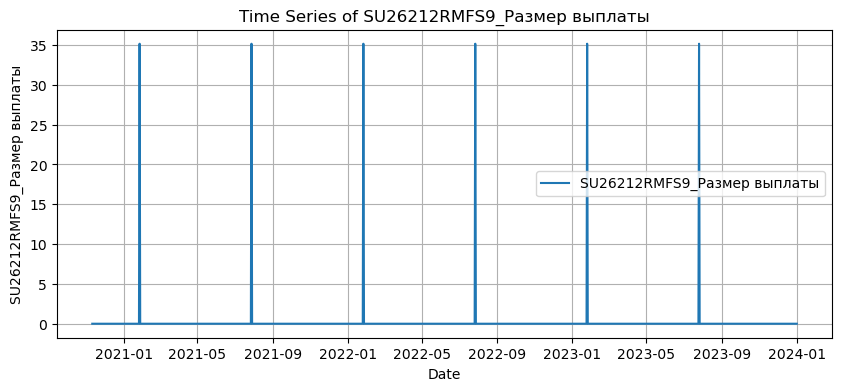

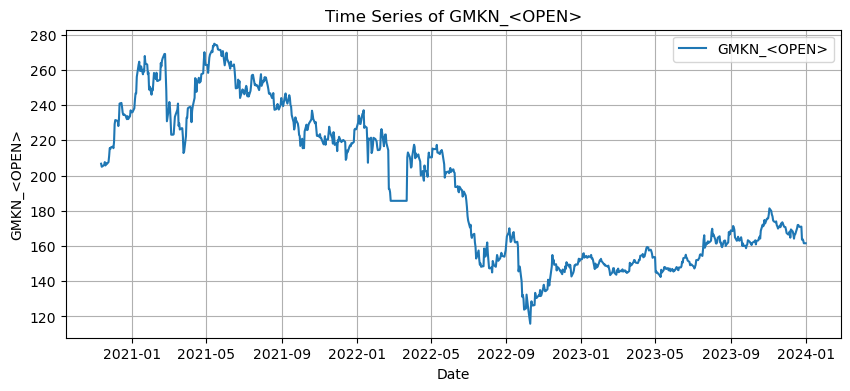

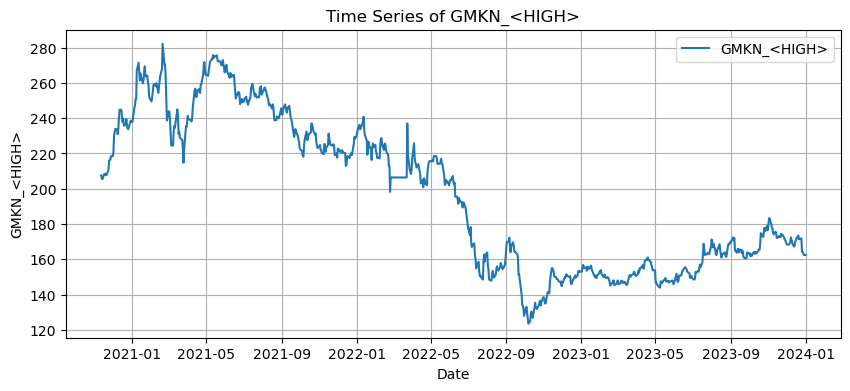

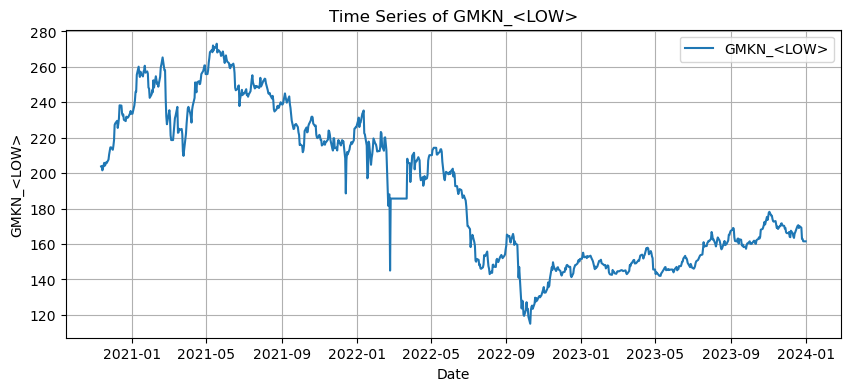

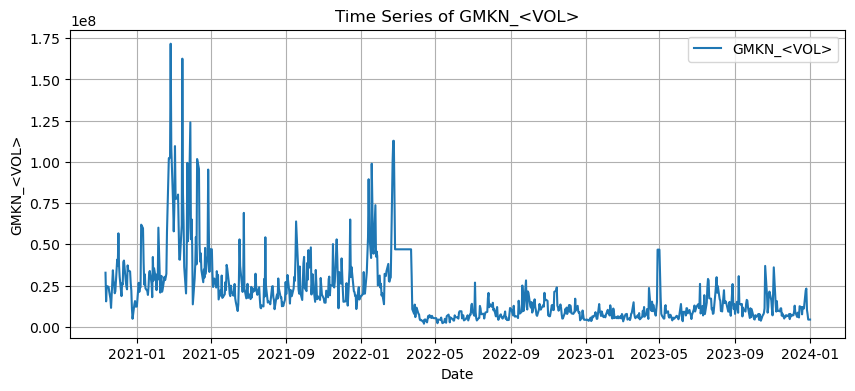

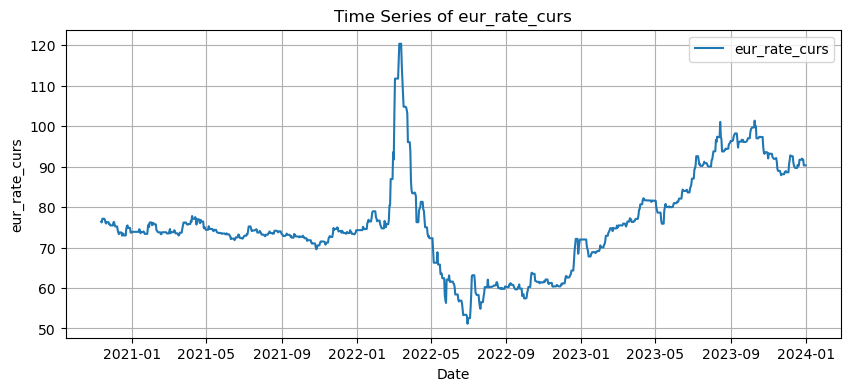

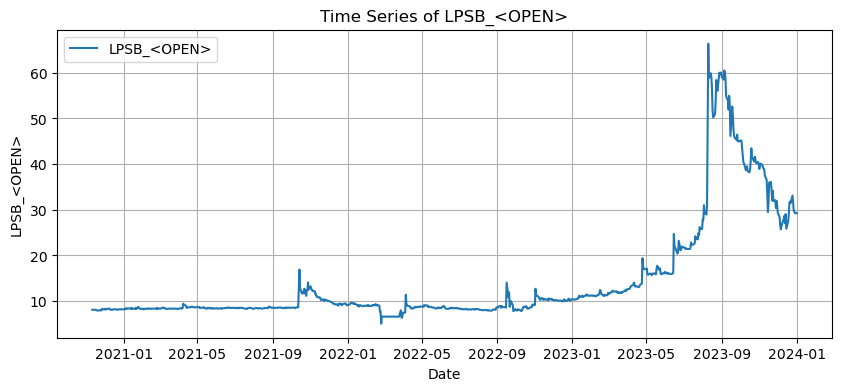

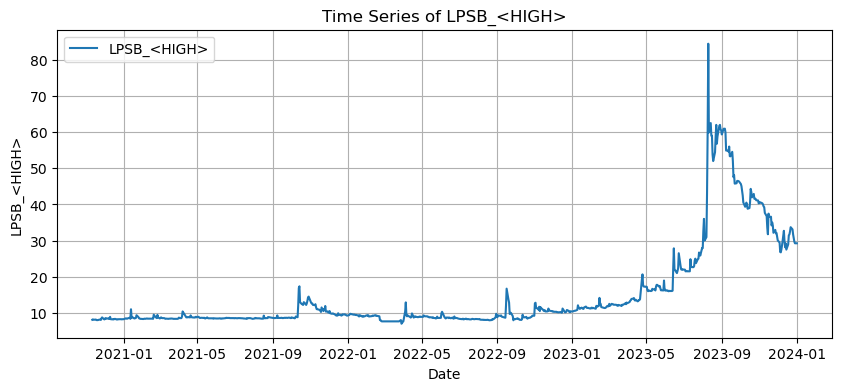

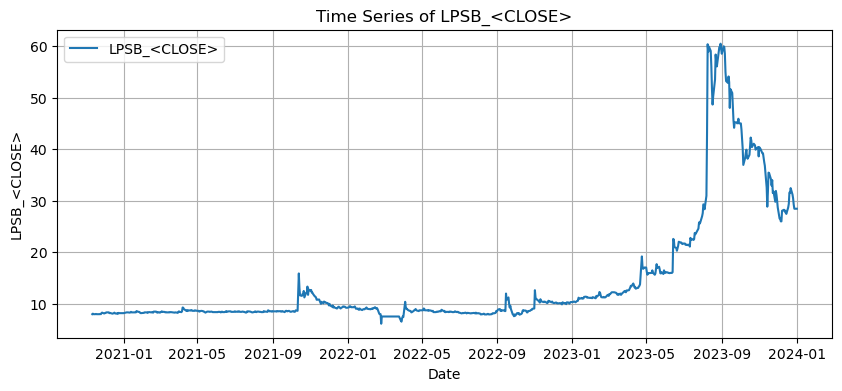

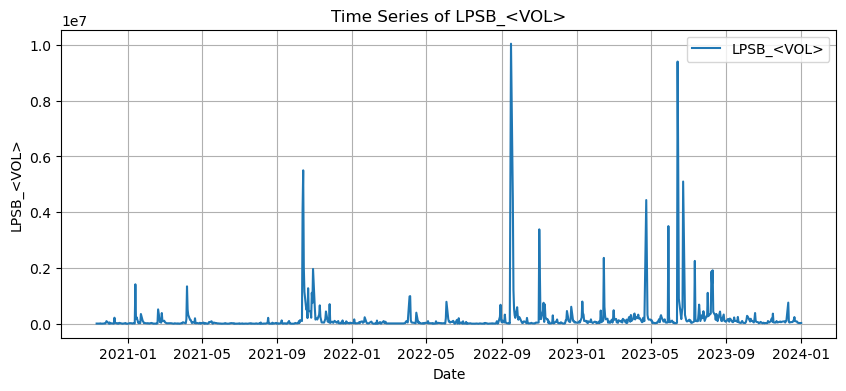

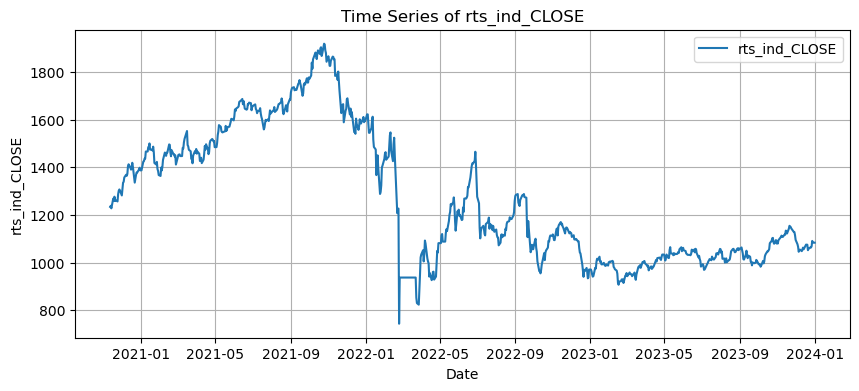

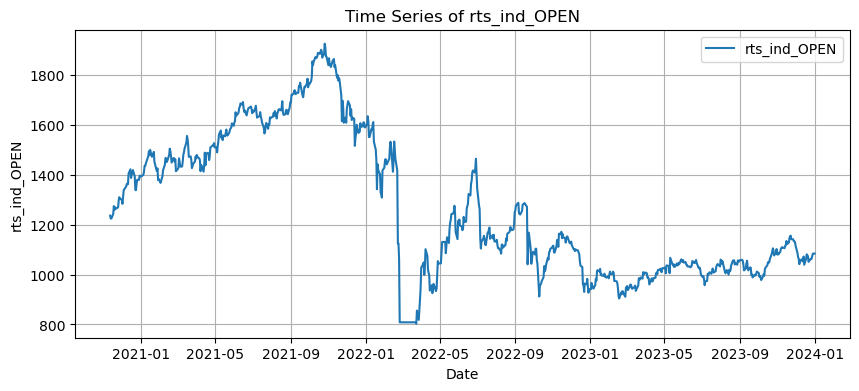

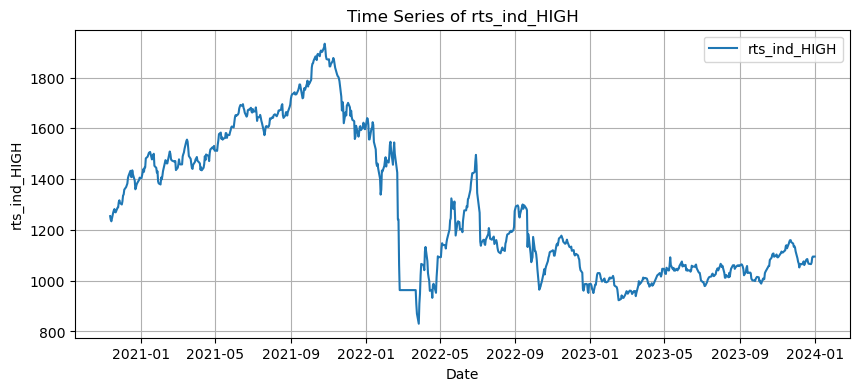

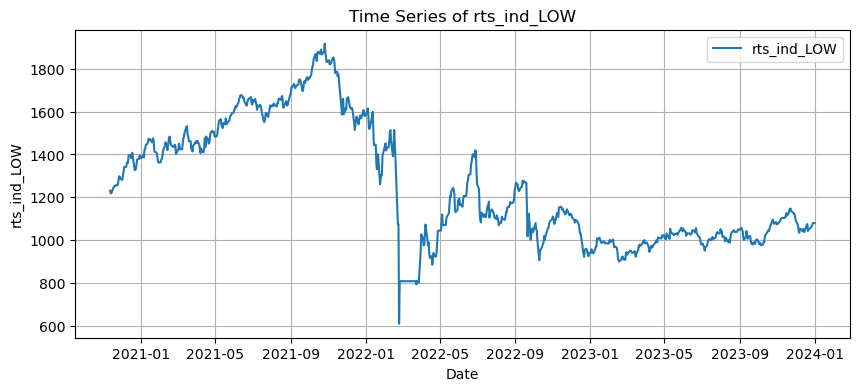

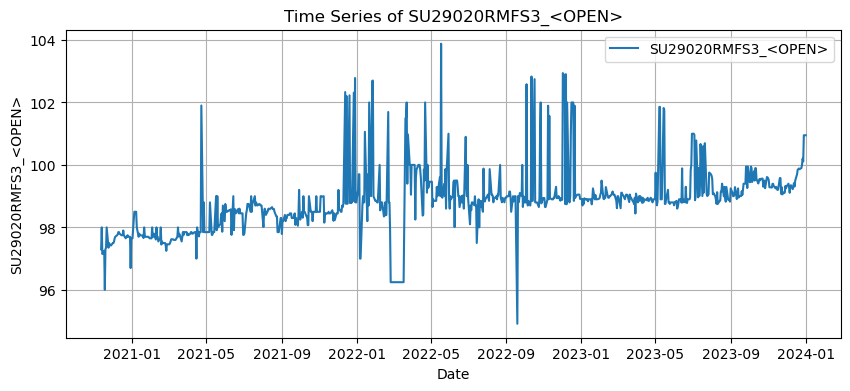

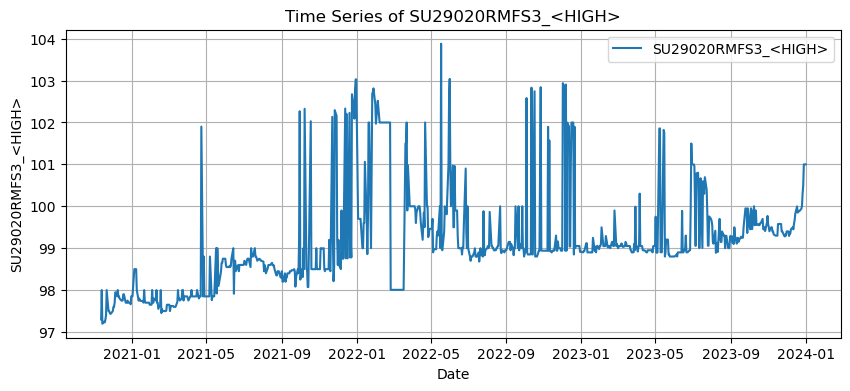

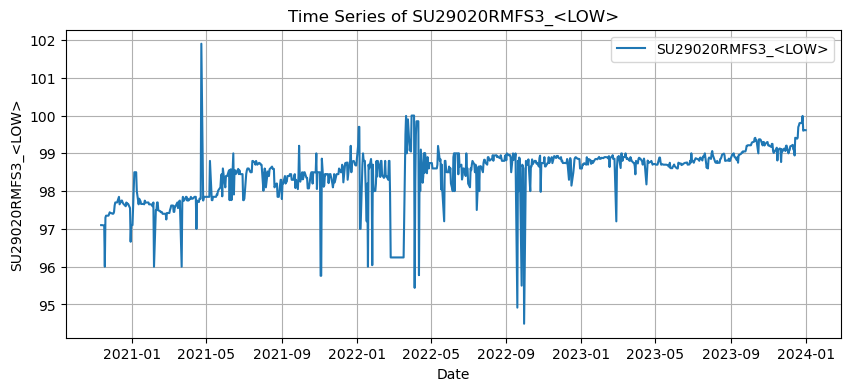

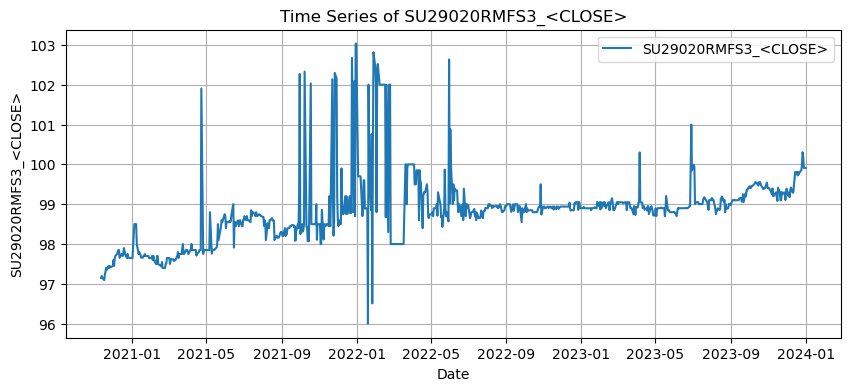

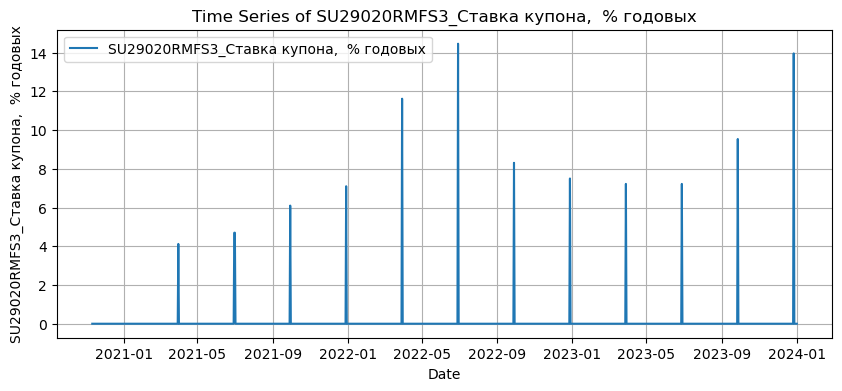

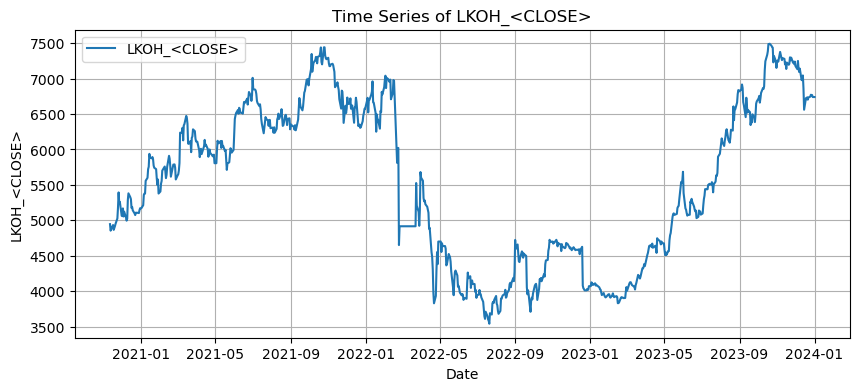

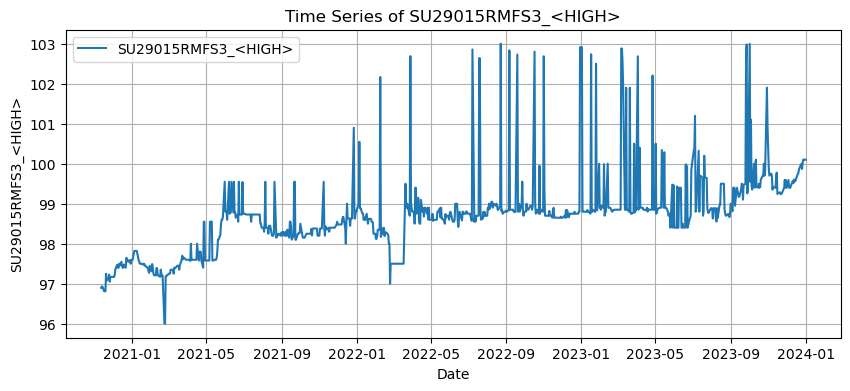

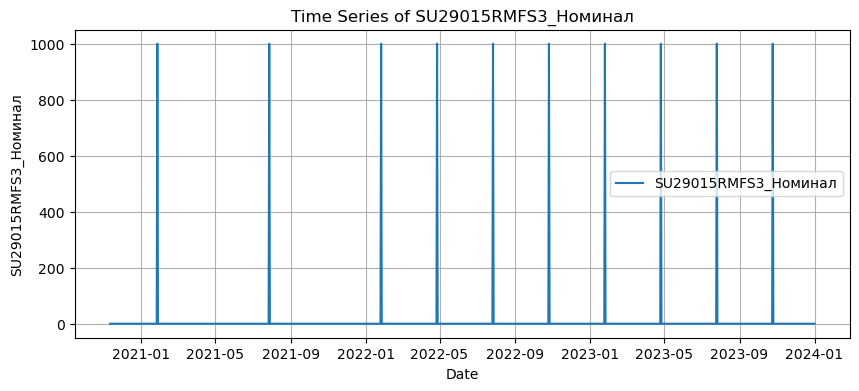

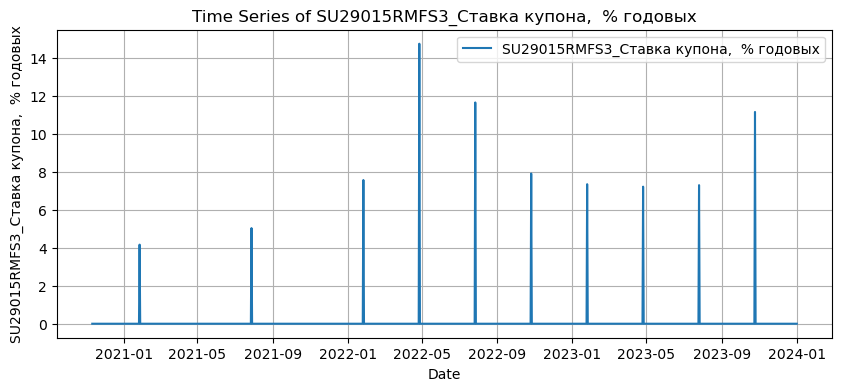

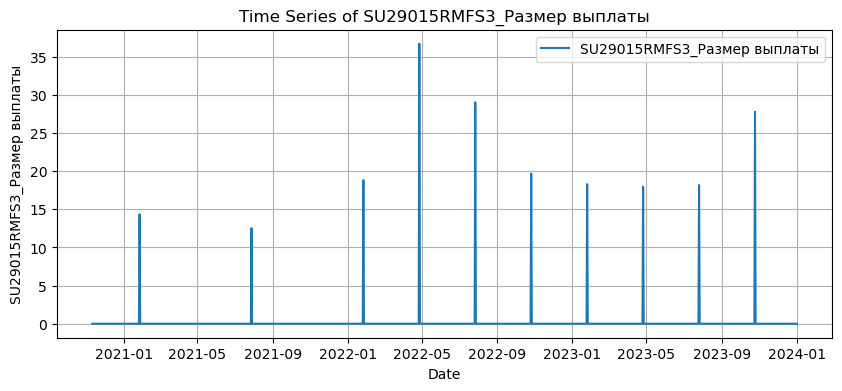

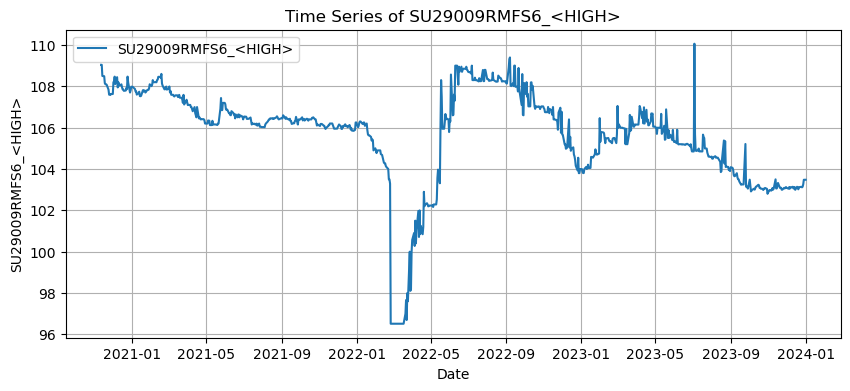

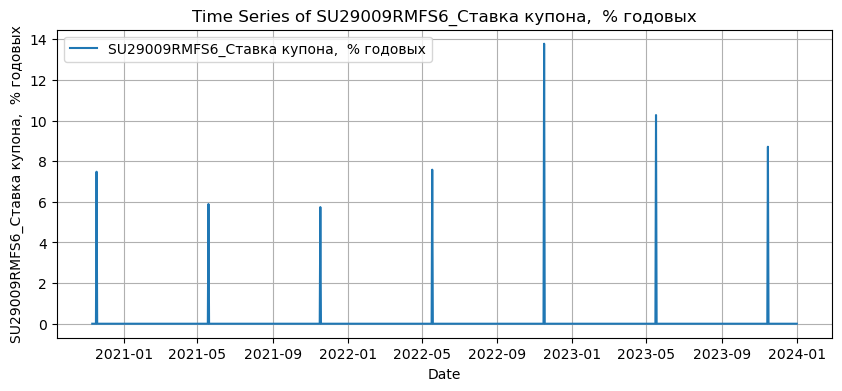

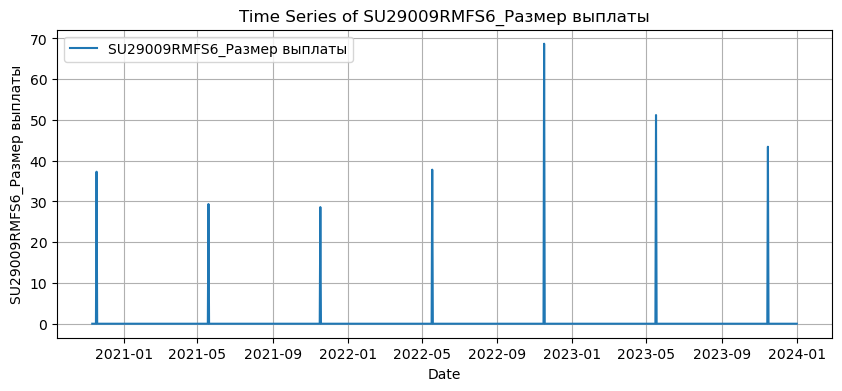

In [21]:
# Визуализация риск-факторов
analyzer.visualize_risk_factors()

In [22]:
# Корреляционная матрица
analyzer.plot_correlation_matrix()

KeyboardInterrupt: 

In [ ]:
# Описательная статистика
stats = analyzer.descriptive_statistics()
stats

Коэффициенты эксцесса (kurtosis) и асимметрии (skewness) являются важными статистическими показателями, которые помогают описывать распределение данных. Вот их определения и интерпретации:

### 1. Асимметрия (Skewness)

**Определение:**
Асимметрия измеряет степень и направление асимметрии распределения данных. Она показывает, насколько распределение отклоняется от нормального распределения влево или вправо.

**Интерпретация:**
- **Skewness = 0**: Распределение является симметричным. Это характерно для нормального распределения.
- **Skewness > 0**: Распределение имеет положительную асимметрию (правостороннюю). Это означает, что хвост справа длиннее или "тяжелее", чем хвост слева. В этом случае большая часть значений сосредоточена слева от среднего значения.
- **Skewness < 0**: Распределение имеет отрицательную асимметрию (левостороннюю). Это означает, что хвост слева длиннее или "тяжелее", чем хвост справа. В этом случае большая часть значений сосредоточена справа от среднего значения.

### 2. Эксцесс (Kurtosis)

**Определение:**
Эксцесс измеряет "тяжесть хвостов" распределения, т.е. насколько хвосты распределения более тяжелые или легкие по сравнению с нормальным распределением.

**Интерпретация:**
- **Kurtosis < 3**: Распределение имеет отрицательный эксцесс (платикуртическое распределение). Это означает, что хвосты распределения легче, а пик распределения более плоский по сравнению с нормальным распределением.
- **Kurtosis = 3**: Распределение имеет нулевой эксцесс (мезокуртическое распределение). Это характерно для нормального распределения.
- **Kurtosis > 3**: Распределение имеет положительный эксцесс (лептокуртическое распределение). Это означает, что хвосты распределения тяжелее, а пик распределения более острый по сравнению с нормальным распределением.

### Примеры:

- **Положительная асимметрия (Skewness > 0)**: Представьте распределение доходов, где большинство людей зарабатывают в пределах среднего дохода, но небольшое количество людей зарабатывает значительно больше. Это создаст длинный правый хвост.

- **Отрицательная асимметрия (Skewness < 0)**: Представьте распределение оценок на экзамене, где большинство студентов получают высокие оценки, но небольшое количество студентов получает значительно низкие оценки. Это создаст длинный левый хвост.

- **Положительный эксцесс (Kurtosis > 3)**: Например, в финансовых данных, где есть частые небольшие колебания и редкие, но значительные выбросы. Это создаст распределение с тяжелыми хвостами и острым пиком.

- **Отрицательный эксцесс (Kurtosis < 3)**: Например, если данные равномерно распределены, то их пик будет более плоским, а хвосты менее тяжелыми по сравнению с нормальным распределением.

### Применение в анализе данных:

Эти показатели помогают понять распределение данных, что важно при анализе риска и принятии решений. В финансовых данных, например, положительный эксцесс может указывать на повышенные риски экстремальных изменений цен, что необходимо учитывать при разработке стратегий управления рисками.

In [ ]:
# Анализ трендов, сезонности и стационарности для примера колонки 'gazp'
analyzer.trend_seasonality_stationarity('brent_prices_price')

In [ ]:
analyzer.visualize_histograms()

In [ ]:
analyzer.visualize_boxplots()